# World Happiness Report: A Clustering Analysis

### Data from World Happiness Report
Original Source: 
World Happiness Report 2020
https://happiness-report.s3.amazonaws.com/2020/WHR20.pdf

Statistical appendix:
https://happiness-report.s3.amazonaws.com/2020/WHR20_Ch2_Statistical_Appendix.pdf

Original Authors:
Editors: John Helliwell, Richard Layard, Jeffrey D. Sachs, and Jan Emmanuel De Neve, Co-Editors; Lara Aknin, Haifang Huang and Shun Wang, Associate Editors; and Sharon Paculor, Production Editor

Citation:
Helliwell, John F., Richard Layard, Jeffrey Sachs, and Jan-Emmanuel De Neve, eds. 2020. World Happiness Report 2020. New York: Sustainable Development Solutions Network

Data compiled by Michael Londeen, available at: https://www.kaggle.com/londeen/world-happiness-report-2020

In [1]:
# Importing libraries
from time import time
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn.metrics as metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_samples, silhouette_score

"""To display all outputs of each cell"""
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

"""To get a timing of each function decorated"""
def timing(f):
    def wrapper(*args, **kwargs):
        start = time()
        result = f(*args, **kwargs)
        end = time()
        print('function:%r took: %2.2f sec' % (f.__name__, end - start))
        return result
    return wrapper


Bad key "“backend" on line 1 in
/Users/rfdanti/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Creating a class for clustering analysis
class clustering():
    """Base processor to be used for all preparation"""""
    def __init__(self, directory, df_): #directory = path to the folder containing df 
        self.input_directory = directory
        self.df = df_
        
    @timing
    def read(self):
        """Read raw data"""
        self.df = pd.read_csv(self.input_directory + self.df)
        print(self.df.head())
        
    @timing
    def preprocessing(self, identifier, columns, index):
        """processing of the input data"""

        #Selecting variables used for clustering analysis 
        self.identifier = identifier # name of columns for identifier
        self.columns = columns # name of columns for predictors

        #Setting country as index & filtering dataframe
        self.X = self.df[(self.identifier+self.columns)]
        self.X = self.X.set_index(index)[self.columns]
        print(self.X.head())
    
    @timing
    def silhouette(self, k_to_check, xlabel, ylabel, x, y):
        print(__doc__)

        self.range_clusters = range(2,k_to_check+1)
        self.n = []
        self.silhouette = []

        for self.n_clusters in self.range_clusters:
            # Create a subplot with 1 row and 2 columns
            self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2)
            self.fig.set_size_inches(18, 7)

            # The 1st subplot is the silhouette plot
            # Set plot of silhouette coefficient ranging from -0.1, 1 
            self.ax1.set_xlim([-0.1, 1])
            # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters.
            self.ax1.set_ylim([0, len(self.X) + (self.n_clusters + 1) * 10])

            # Initialize the clusterer with n_clusters value and a random generator set seed for reproducibility, 
            # if random_state=None, the random number generator is the RandomState instance used by np.random 
            self.clusterer = KMeans(n_clusters=self.n_clusters, max_iter=100, n_init=10, random_state=1000)
            self.cluster_labels = self.clusterer.fit_predict(self.X)

            # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed clusters
            self.silhouette_avg = silhouette_score(self.X, self.cluster_labels)
            self.n.append(self.n_clusters)
            self.silhouette.append(self.silhouette_avg)
            print("For n_clusters =", self.n_clusters,
                  "The average silhouette_score is :", self.silhouette_avg)

            # Compute the silhouette scores for each sample
            self.sample_silhouette_values = silhouette_samples(self.X, self.cluster_labels)

            self.y_lower = 10
            for i in range(self.n_clusters):
                # Aggregate the silhouette scores for samples belonging to
                # cluster i, and sort them
                self.ith_cluster_silhouette_values = \
                    self.sample_silhouette_values[self.cluster_labels == i]

                self.ith_cluster_silhouette_values.sort()

                self.size_cluster_i = self.ith_cluster_silhouette_values.shape[0]
                self.y_upper = self.y_lower + self.size_cluster_i

                self.color = cm.nipy_spectral(float(i) / self.n_clusters)
                self.ax1.fill_betweenx(np.arange(self.y_lower, self.y_upper),
                                  0, self.ith_cluster_silhouette_values,
                                  facecolor=self.color, edgecolor=self.color, alpha=0.7)

                # Label the silhouette plots with their cluster numbers at the middle
                self.ax1.text(-0.05, self.y_lower + 0.5 * self.size_cluster_i, str(i))

                # Compute the new y_lower for next plot
                self.y_lower = self.y_upper + 10  # 10 for the 0 samples

            self.ax1.set_title("The silhouette plot for the various clusters.")
            self.ax1.set_xlabel("The silhouette coefficient values")
            self.ax1.set_ylabel("Cluster label")

            # The vertical line for average silhouette score of all the values
            self.ax1.axvline(x=self.silhouette_avg, color="red", linestyle="--")

            self.ax1.set_yticks([])  # Clear the yaxis labels / ticks
            self.ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

            # 2nd Plot showing the actual clusters formed
            self.colors = cm.nipy_spectral(self.cluster_labels.astype(float) / self.n_clusters)
            self.ax2.scatter(self.X.iloc[:,x], self.X.iloc[:,y], marker='.', s=30, lw=0, alpha=0.7,
                        c=self.colors, edgecolor='k')

            # Labeling the clusters
            self.centers = self.clusterer.cluster_centers_
            # Draw white circles at cluster centers
            self.ax2.scatter(self.centers[:, x], self.centers[:, y], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')

            for i, c in enumerate(self.centers):
                self.ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1,
                            s=50, edgecolor='k')

            self.ax2.set_title("The visualization of the clustered data.")
            self.ax2.set_xlabel(xlabel)
            self.ax2.set_ylabel(ylabel)

            plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                          "with n_clusters = %d" % self.n_clusters),
                         fontsize=14, fontweight='bold')

        # Calling DataFrame constructor after zipping both lists, with columns specified 
        self.s = pd.DataFrame(list(zip(self.n, self.silhouette)), 
                         columns =['N of clusters', 'Silhouette score']) 
        # Plotting silhouette score for all k
        self.fig, self.ax = plt.subplots(1, 1)
        self.fig.set_size_inches(18, 7)

        self.ax.plot(self.s['N of clusters'], self.s['Silhouette score'], 'bx-')
        self.ax.set_xlabel('N of clusters')
        self.ax.set_ylabel('Silhouette score')
        self.ax.set_title('Silhouette Method For Optimal k')
        
        plt.show()
    
    @timing
    def elbow(self,k_to_check):
        self.Sum_of_squared_distances = []
        self.K = range(2,k_to_check+1)
        for k in self.K:
            self.km = KMeans(n_clusters=k)
            self.km = self.km.fit(self.X)
            self.Sum_of_squared_distances.append(self.km.inertia_)

        plt.plot(self.K, self.Sum_of_squared_distances, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Sum_of_squared_distances')
        plt.title('Elbow Method For Optimal k')
        plt.show()
    
    @timing
    def model_fit(self, chosen_k, max_iter=100, n_init=10, random_state=1000):
        self.chosen_k = chosen_k
        self.model = KMeans(n_clusters=self.chosen_k, max_iter=max_iter, n_init=n_init, random_state=random_state)
        self.cluster_labels = self.model.fit_predict(self.X)
        
        self.df["Cluster label"] = self.cluster_labels
        
        return self.df
    
    @timing    
    def visualize_model(self, xlabel, ylabel, x, y):
        
        # Plot showing the clusters formed
        self.colors = cm.nipy_spectral(self.cluster_labels.astype(float) / self.chosen_k)
        plt.scatter(self.X.iloc[:,x], self.X.iloc[:,y], marker='.', s=30, lw=0, alpha=0.7,
                        c=self.colors, edgecolor='k')

        # Labeling the clusters
        self.centers = self.model.cluster_centers_
        # Draw white circles at cluster centers
        plt.scatter(self.centers[:, x], self.centers[:, y], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(self.centers):
            plt.scatter(c[x], c[y], marker='$%d$' % i, alpha=1,
                            s=50, edgecolor='k')

        plt.title("The visualization of the clustered data.")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

In [3]:
WHR = clustering("", "WHR20.csv")
WHR.read()

  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559  

In [4]:
#Selecting columns to be used as identifier and predictors
WHR.preprocessing(["Country name", "Regional indicator", "Ladder score"], 
                 ["Logged GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"],
                 "Country name")

              Logged GDP per capita  Social support  Healthy life expectancy  \
Country name                                                                   
Finland                   10.639267        0.954330                71.900825   
Denmark                   10.774001        0.955991                72.402504   
Switzerland               10.979933        0.942847                74.102448   
Iceland                   10.772559        0.974670                73.000000   
Norway                    11.087804        0.952487                73.200783   

              Freedom to make life choices  Generosity  \
Country name                                             
Finland                           0.949172   -0.059482   
Denmark                           0.951444    0.066202   
Switzerland                       0.921337    0.105911   
Iceland                           0.948892    0.246944   
Norway                            0.955750    0.134533   

              Perceptions of cor

To get a timing of each function decorated
For n_clusters = 2 The average silhouette_score is : 0.6292103226648641
For n_clusters = 3 The average silhouette_score is : 0.5740394925913994
For n_clusters = 4 The average silhouette_score is : 0.5568152286278297
For n_clusters = 5 The average silhouette_score is : 0.5327962855495122
For n_clusters = 6 The average silhouette_score is : 0.5354258250945861
For n_clusters = 7 The average silhouette_score is : 0.4873108435891667
For n_clusters = 8 The average silhouette_score is : 0.4679134551494311
For n_clusters = 9 The average silhouette_score is : 0.459785205117597
For n_clusters = 10 The average silhouette_score is : 0.4551647959166173


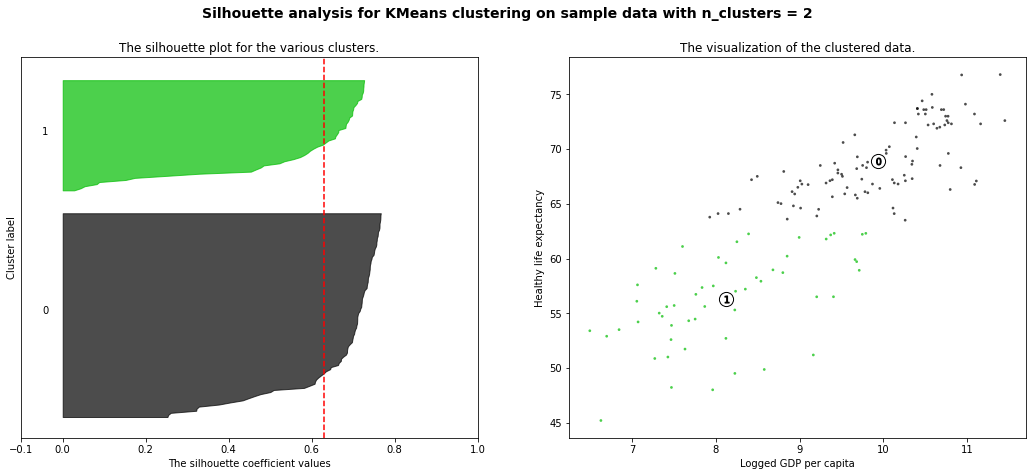

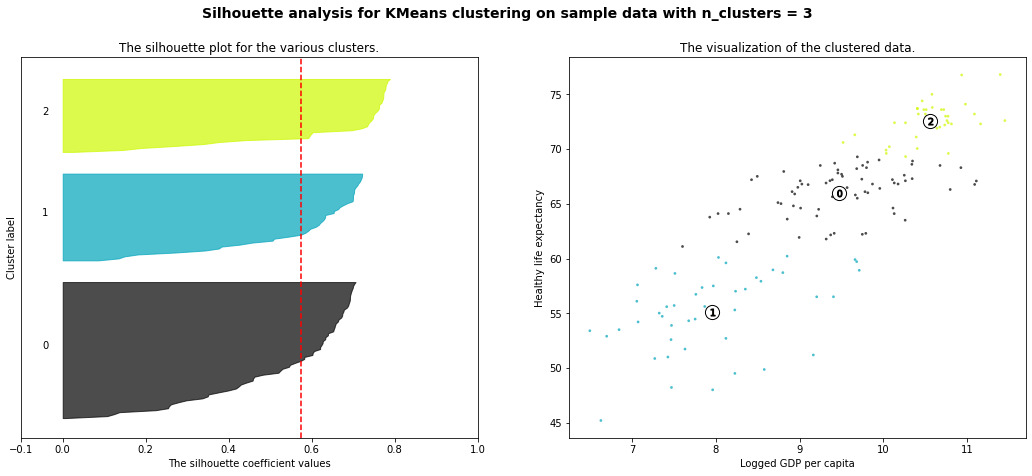

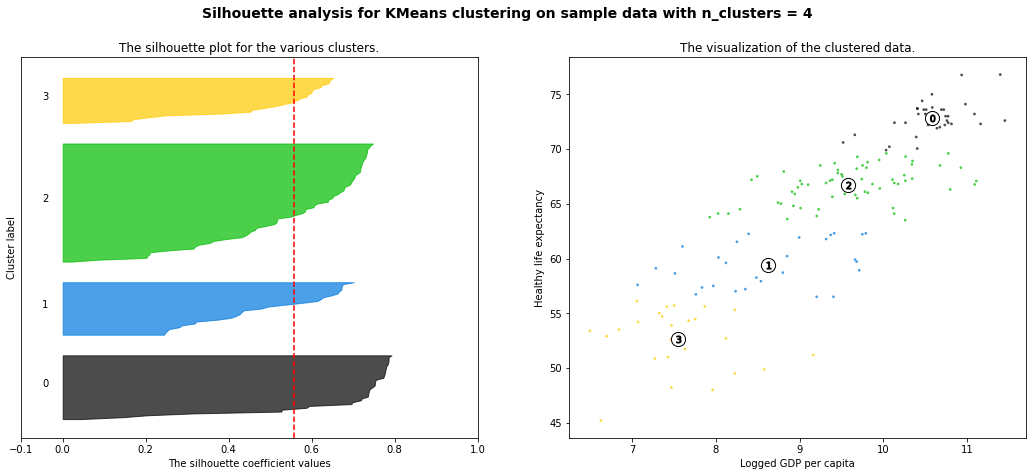

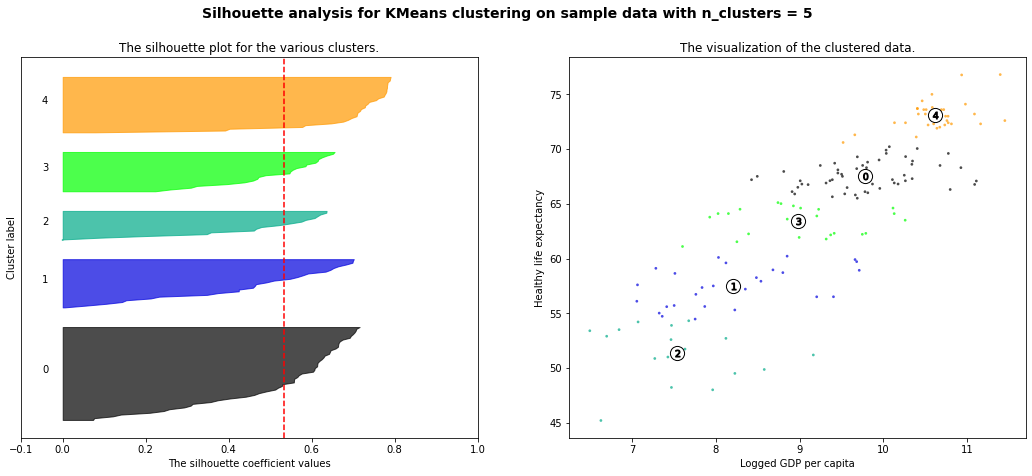

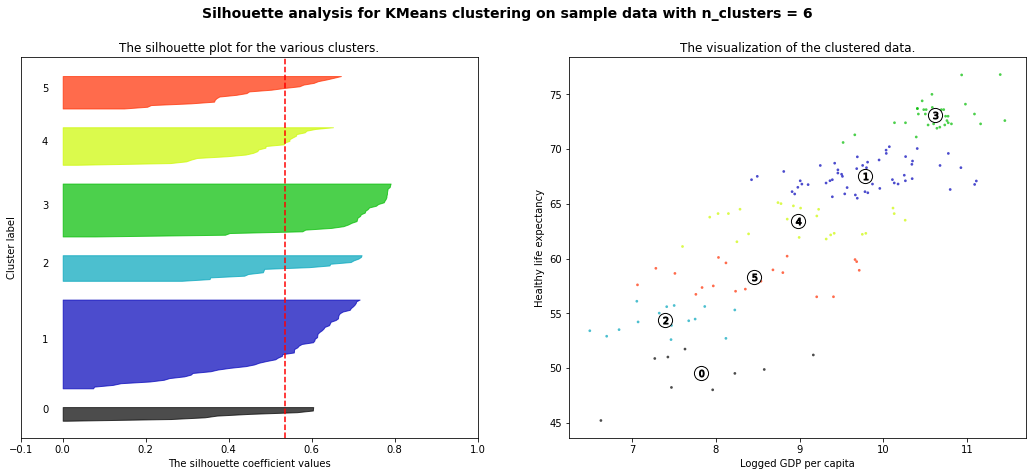

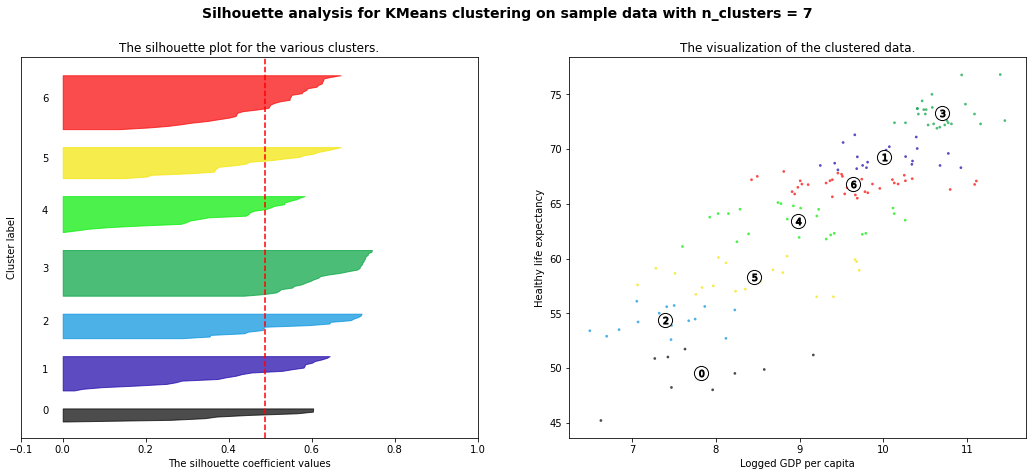

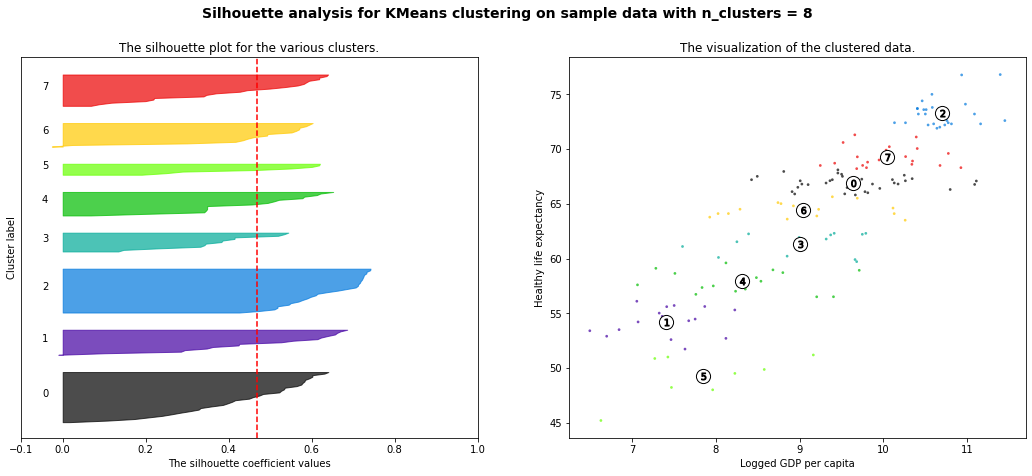

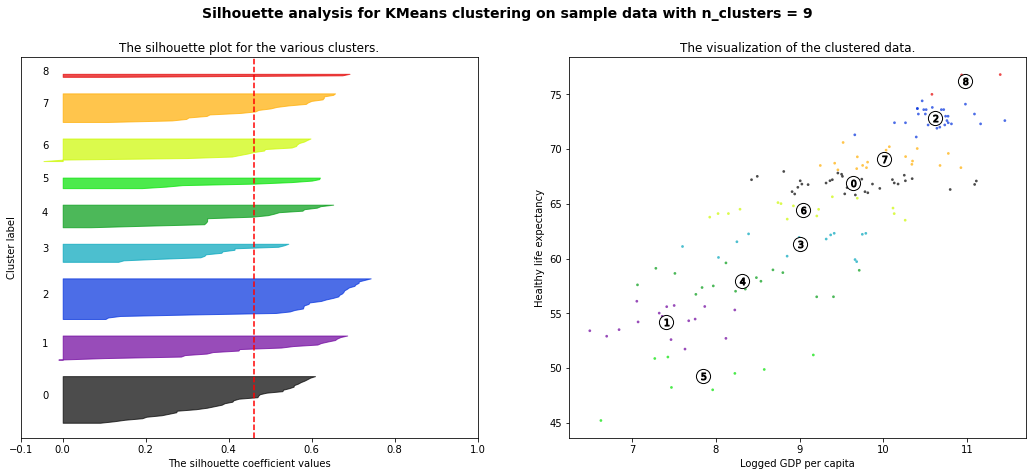

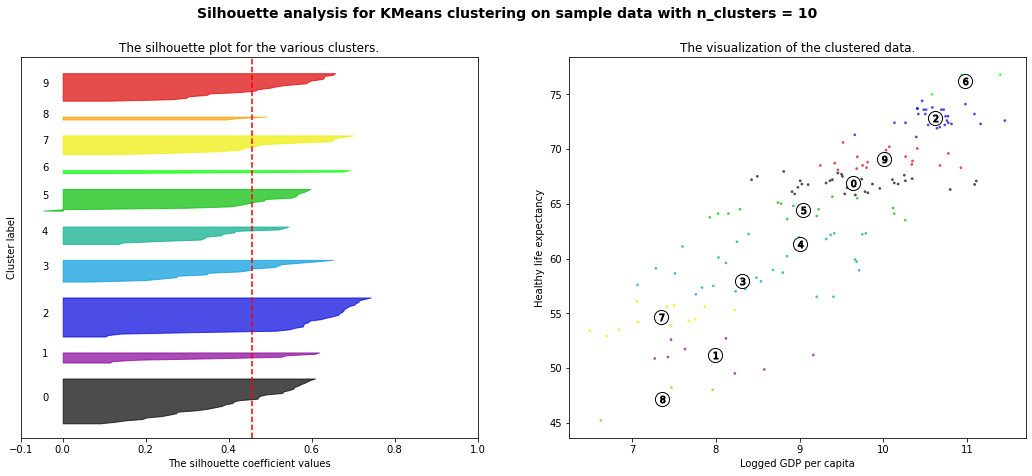

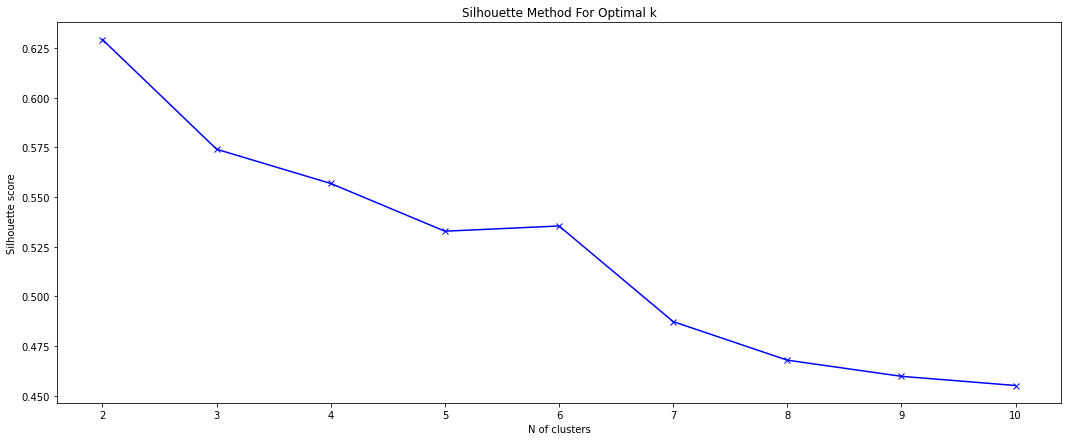

function:'silhouette' took: 3.59 sec


In [5]:
#Applying silhouette method to help choosing number of k for K-means clustering
#Choose 2 variables for visualisation purpose. K-means clustering model still consider all variables as input
WHR.silhouette(10, "Logged GDP per capita", "Healthy life expectancy", 0, 2)

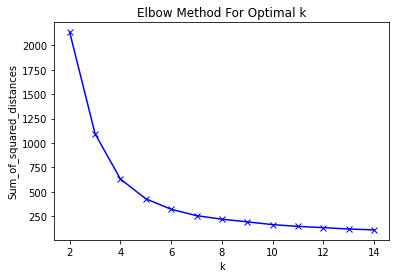

function:'elbow' took: 0.72 sec


In [6]:
#Applying elbow method to help choosing number of k for K-means clustering
WHR.elbow(14)

In [11]:
#Fitting K-Means Clustering model to cluster data
update_df = WHR.model_fit(6)
update_df

function:'model_fit' took: 0.04 sec


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Cluster label
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,3
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,3
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,3
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,3
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,0
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,4
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,2
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,0


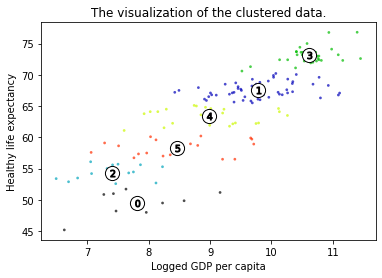

In [12]:
WHR.visualize_model("Logged GDP per capita", "Healthy life expectancy", 0, 2)

In [13]:
# Saving clustered data to csv
update_df.to_csv("WHR-clusters.csv", index=False)